<a href="https://colab.research.google.com/github/ayoub-kplr/AI-Architecture-Cloud/blob/main/AI/Regression_Logistique/Regression_Logistique_Exercice.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prédiction de churn des employés par régression logistique et streamlit**


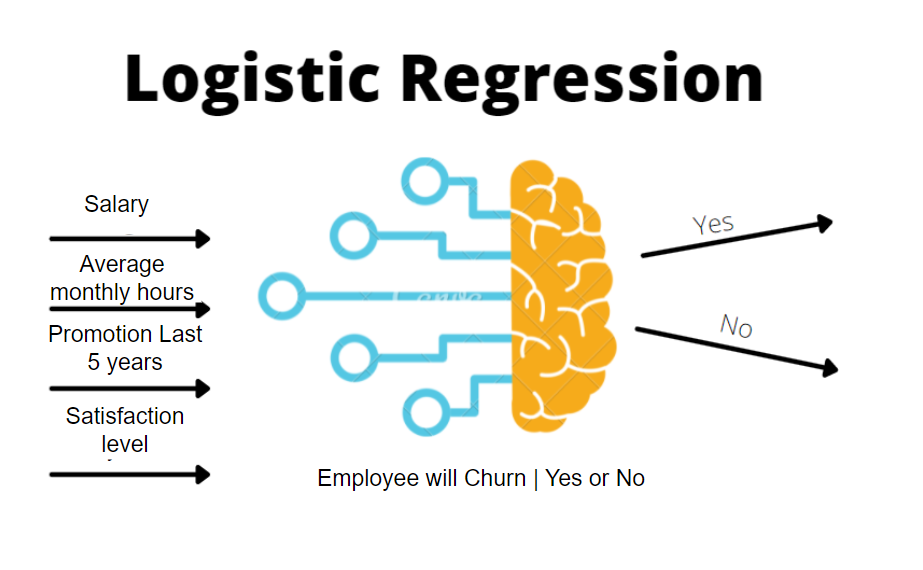






## Énoncé du problème
- Nous voulons prédire qui, parmi nos employés, est susceptible de partir.


## Visualiser nos données


In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('emp_analytics.csv')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.shape

(14999, 10)

In [ ]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Ingénierie des fonctionnalités


In [ ]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [ ]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [ ]:
pd.get_dummies(df.salary)

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','left']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1


In [ ]:
subdf.columns

Index(['satisfaction_level', 'average_montly_hours', 'promotion_last_5years',
       'salary', 'left'],
      dtype='object')

In [ ]:
salaries_dummies=pd.get_dummies(subdf.salary,prefix="salary")

In [ ]:
salaries_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [ ]:
##concatenation - merge columns
df=pd.concat([subdf,salaries_dummies],axis='columns')

In [ ]:
df.sample(20)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left,salary_high,salary_low,salary_medium
13939,0.95,258,1,medium,0,0,0,1
2565,0.48,273,0,medium,0,0,0,1
1691,0.39,160,0,low,1,0,1,0
11067,0.51,185,0,low,0,0,1,0
13148,0.92,236,1,medium,0,0,0,1
6064,0.73,214,0,medium,0,0,0,1
11932,0.82,194,0,low,0,0,1,0
9415,0.25,182,0,low,0,0,1,0
4360,0.74,258,0,medium,0,0,0,1
943,0.81,235,0,low,1,0,1,0


Nous devons maintenant supprimer la colonne de salaire qui contient des données textuelles. Il est déjà remplacé par des variables factices afin que nous puissions le supprimer en toute sécurité


In [ ]:
df.drop('salary',inplace=True,axis='columns')

In [ ]:
df.sample(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,left,salary_high,salary_low,salary_medium
6966,0.90,185,0,0,0,1,0
14446,0.83,255,0,1,0,1,0
6691,0.14,254,0,0,0,1,0
9487,0.62,250,0,0,0,1,0
13931,0.31,150,0,0,0,0,1


In [ ]:
X=df.drop('left',axis='columns')


In [ ]:
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [ ]:
y=df[['left']]

In [ ]:
y

,left
0,1
1,1
2,1
3,1
4,1
...,...
14994,1
14995,1
14996,1
14997,1


In [ ]:
y.value_counts()

left
0       11428
1        3571
dtype: int64

## Ensemble de données déséquilibré


## SMOTE - Technique de suréchantillonnage minoritaire synthétique


In [ ]:
### Install
#!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm=SMOTE(random_state=42)

In [ ]:
X,y=sm.fit_resample(X,y)

In [ ]:
y.value_counts()

left
0       11428
1       11428
dtype: int64

In [ ]:
y

,left
0,1
1,1
2,1
3,1
4,1
...,...
22851,1
22852,1
22853,1
22854,1


In [ ]:
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.380000,157,0,0,1,0
1,0.800000,262,0,0,0,1
2,0.110000,272,0,0,0,1
3,0.720000,223,0,0,1,0
4,0.370000,159,0,0,1,0
...,...,...,...,...,...,...
22851,0.100000,268,0,0,1,0
22852,0.422742,277,0,0,0,1
22853,0.740000,222,0,0,1,0
22854,0.436711,145,0,0,1,0


In [ ]:
y.shape

(22856, 1)

In [ ]:
X.shape

(22856, 6)

### Diviser l'ensemble de données


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
X_train.shape

(15999, 6)

In [ ]:
y_train.shape

(15999, 1)

In [ ]:
X_test.shape

(6857, 6)

In [ ]:
y_test.shape

(6857, 1)

In [ ]:
y_test

,left
4610,0
10913,0
950,1
8965,0
7808,0
...,...
9405,0
4077,0
9264,0
13121,0


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
model.score(X_test,y_test)

0.7220358757474115

In [ ]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("emp-model.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 65.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 110.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 10.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


In [ ]:
%%writefile streamlit_app.py 
import streamlit as st
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import pickle


app_mode = st.sidebar.selectbox('Select Page',['Home','Predict_Churn'])

if app_mode=='Home':
    st.title('Employee Prediction')
    st.markdown('Dataset :')
    df=pd.read_csv('emp_analytics.csv')
    st.write(df.head())


elif app_mode == 'Predict_Churn':

    st.subheader('Fill in employee details to get prediction ')
    st.sidebar.header("Other details :")
    prop = {'salary_low': 1, 'salary_high': 2, 'salary_medium': 3}
    satisfaction_level = st.number_input("satisfaction_level", min_value=0.0, max_value=1.0)
    average_montly_hours = st.number_input("average_montly_hours")
    promotion_last_5year = st.number_input("promotion_last_5year")
    salary = st.sidebar.radio("Select Salary ",tuple(prop.keys()))

    salary_low,salary_medium,salary_high=0,0,0
    if salary == 'High':
        salary_high = 1
    elif salary == 'Low':
        salary_low = 1
    else :salary_medium = 1


    subdata={
        'satisfaction_level':satisfaction_level,
        'average_montly_hours ':average_montly_hours ,
        'promotion_last_5year':   promotion_last_5year,
        'salary':[salary_low,salary_medium,salary_high],
        }

    features = [satisfaction_level, average_montly_hours, promotion_last_5year, subdata['salary'][0],subdata['salary'][1], subdata['salary'][2]]

    results = np.array(features).reshape(1, -1)

    if st.button("Predict"):

        picklefile = open("emp-model.pkl", "rb")
        model = pickle.load(picklefile)

        prediction = model.predict(results)
        if prediction[0] == 0:
            st.success('Employee will not churn')
        elif prediction[0] == 1:
            st.error( 'Employee will churn')

Overwriting streamlit_app.py


In [ ]:
!streamlit run /content/streamlit_app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 1.262s
your url is: https://little-bushes-beg-35-224-77-163.loca.lt
^C


In [ ]:
!python /content/streamlit_app.py

2023-02-14 10:49:01.962 
  command:

    streamlit run /content/streamlit_app.py [ARGUMENTS]
